In [1]:
import numpy as np
import pandas as pd
import sklearn
import random
import time
from time import time
from matplotlib import pyplot as plt

# For Keras
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LambdaCallback
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.core import Dropout
from keras import regularizers
from keras.models import Model, load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import ELU, PReLU, LeakyReLU
from keras.layers import *
from tensorflow_addons.layers import GroupNormalization
from keras.models import Model
from keras.utils.vis_utils import plot_model

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint

from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [2]:
list_f1 = []
list_time = []
lr = 10**-5

In [3]:
data = pd.read_csv("dataset/cell2celltrain.csv")

data_cp = data.copy()
data_cp

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
def yes_no_encode(x):
    if (x == "Yes" or x == "Known"):
        return 1
    else:
        return 0

le = LabelEncoder()

In [5]:
data_cp = data.copy()

data_cp["ChildrenInHH"] = le.fit_transform(data_cp["ChildrenInHH"])

data_cp["HandsetRefurbished"] = le.fit_transform(data_cp["HandsetRefurbished"])

data_cp["HandsetWebCapable"] = le.fit_transform(data_cp["HandsetWebCapable"])

data_cp["TruckOwner"] = le.fit_transform(data_cp["TruckOwner"])

data_cp["RVOwner"] = le.fit_transform(data_cp["RVOwner"])

data_cp["Homeownership"] = le.fit_transform(data_cp["Homeownership"])

data_cp["BuysViaMailOrder"] = le.fit_transform(data_cp["BuysViaMailOrder"])

data_cp["RespondsToMailOffers"] = le.fit_transform(data_cp["RespondsToMailOffers"])

data_cp["OptOutMailings"] = le.fit_transform(data_cp["OptOutMailings"])

data_cp["NonUSTravel"] = le.fit_transform(data_cp["NonUSTravel"])

data_cp["OwnsComputer"] = le.fit_transform(data_cp["OwnsComputer"])

data_cp["HasCreditCard"] = le.fit_transform(data_cp["HasCreditCard"])

data_cp["NonUSTravel"] = le.fit_transform(data_cp["NonUSTravel"])

data_cp["NotNewCellphoneUser"] = le.fit_transform(data_cp["NotNewCellphoneUser"])

data_cp["OwnsMotorcycle"] = le.fit_transform(data_cp["OwnsMotorcycle"])

data_cp["MadeCallToRetentionTeam"] = le.fit_transform(data_cp["MadeCallToRetentionTeam"])

data_cp["NewCellphoneUser"] = le.fit_transform(data_cp["NewCellphoneUser"])

data_cp["MaritalStatus"] = le.fit_transform(data_cp["MaritalStatus"])

data_cp["Occupation"] = le.fit_transform(data_cp["Occupation"])

data_cp["ServiceArea"] = le.fit_transform(data_cp["ServiceArea"])

data_cp["PrizmCode"] = le.fit_transform(data_cp["PrizmCode"])

data_cp["CreditRating"] = data_cp["CreditRating"].apply(lambda x: int(x[0]))

data_cp["HandsetPrice"] = data_cp["HandsetPrice"].apply(lambda x: 0 if (x == "Unknown") else x)

data_cp["Churn"] = data_cp["Churn"].apply(yes_no_encode)

data_cp = data_cp.fillna(0)

data_cp.to_csv("checkcheckcell2cell.csv")
data_cp

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,30,1,1,2,4,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,30,0,4,2,4,2
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,0,0,3,3,1,2
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,10,0,4,0,3,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,10,0,1,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,6,0,0,60,0,1,2,3,2
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,0,1,60,0,3,0,3,0
51044,3399978,1,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,7,0,1,80,0,5,0,0,0
51045,3399990,0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,9,0,0,30,0,5,0,3,0


In [6]:
cols = [c for c in data_cp.columns if c not in ['Churn','CustomerID']]

X = data_cp[cols]
y = data_cp["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train = StandardScaler().fit_transform(X_train[cols].values)
y_train = y_train.values

X_test = StandardScaler().fit_transform(X_test[cols].values)
y_test = y_test.values

# Deep Learning

## No Norm

In [8]:
model = Sequential()
model.add(Dense(512, input_dim=int(X_train.shape[1])))
#model.add(LayerNormalization())
model.add(Activation('relu'))

model.add(Dense(256))
#model.add(LayerNormalization())
model.add(Activation('relu'))

model.add(Dense(128))
#model.add(LayerNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
#model.add(LayerNormalization())
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29184     
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [9]:
# Fit the model
start_time = time()
no_norm = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 1s 12ms/step - loss: 0.6558 - accuracy: 0.7046 - auc: 0.5142 - val_loss: 0.6422 - val_accuracy: 0.7159 - val_auc: 0.5130
Epoch 2/10
31/31 [==============================] - 0s 7ms/step - loss: 0.6367 - accuracy: 0.7098 - auc: 0.5167 - val_loss: 0.6259 - val_accuracy: 0.7161 - val_auc: 0.5130
Epoch 3/10
31/31 [==============================] - 0s 7ms/step - loss: 0.6237 - accuracy: 0.7099 - auc: 0.5200 - val_loss: 0.6153 - val_accuracy: 0.7161 - val_auc: 0.5156
Epoch 4/10
31/31 [==============================] - 0s 7ms/step - loss: 0.6156 - accuracy: 0.7099 - auc: 0.5239 - val_loss: 0.6089 - val_accuracy: 0.7161 - val_auc: 0.5189
Epoch 5/10
31/31 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.7099 - auc: 0.5305 - val_loss: 0.6049 - val_accuracy: 0.7161 - val_auc: 0.5238
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.7099 - auc: 0.5365 - val_loss: 0.6020 - val_ac

In [10]:
predictions = model.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 0s 759us/step


D:\anaconda\envs\staycurios666\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\staycurios666\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\staycurios666\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
list_time.append(delta_time)

## Batch Norm

In [12]:
model_batch_norm = Sequential()
model_batch_norm.add(Dense(512, input_dim=int(X_train.shape[1])))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Activation('relu'))

model_batch_norm.add(Dense(256))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Activation('relu'))

model_batch_norm.add(Dense(128))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Activation('relu'))

model_batch_norm.add(Dense(64))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Activation('relu'))

model_batch_norm.add(Dense(1, activation='sigmoid'))

# Compile model
model_batch_norm.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_batch_norm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               29184     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 256)              

In [13]:
# Fit the model
start_time = time()
batch_norm = model_batch_norm.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 1s 18ms/step - loss: 0.7436 - accuracy: 0.5056 - auc_1: 0.5040 - val_loss: 0.6990 - val_accuracy: 0.4528 - val_auc_1: 0.4977
Epoch 2/10
31/31 [==============================] - 0s 12ms/step - loss: 0.7202 - accuracy: 0.5303 - auc_1: 0.5145 - val_loss: 0.7099 - val_accuracy: 0.4336 - val_auc_1: 0.5061
Epoch 3/10
31/31 [==============================] - 0s 13ms/step - loss: 0.7039 - accuracy: 0.5516 - auc_1: 0.5245 - val_loss: 0.7106 - val_accuracy: 0.4596 - val_auc_1: 0.5139
Epoch 4/10
31/31 [==============================] - 0s 13ms/step - loss: 0.6895 - accuracy: 0.5685 - auc_1: 0.5350 - val_loss: 0.7056 - val_accuracy: 0.4930 - val_auc_1: 0.5220
Epoch 5/10
31/31 [==============================] - 0s 12ms/step - loss: 0.6799 - accuracy: 0.5841 - auc_1: 0.5431 - val_loss: 0.6988 - val_accuracy: 0.5250 - val_auc_1: 0.5293
Epoch 6/10
31/31 [==============================] - 0s 12ms/step - loss: 0.6706 - accuracy: 0.5981 - auc_1: 0.5502 

In [14]:
predictions = model_batch_norm.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 0s 883us/step


In [15]:
list_time.append(delta_time)

## Batch Norm + drop out:

In [16]:
model_batch_drop = Sequential()
model_batch_drop.add(Dense(512, input_dim=int(X_train.shape[1])))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Activation('relu'))
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(256))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Activation('relu'))
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(128))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Activation('relu'))
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(64))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Activation('relu'))
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(1, activation='sigmoid'))

# Compile model
model_batch_drop.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_batch_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               29184     
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [17]:
# Fit the model
start_time = time()
batch_drop = model_batch_drop.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 2s 24ms/step - loss: 0.8111 - accuracy: 0.5324 - auc_2: 0.4946 - val_loss: 0.6775 - val_accuracy: 0.6219 - val_auc_2: 0.5010
Epoch 2/10
31/31 [==============================] - 1s 17ms/step - loss: 0.7944 - accuracy: 0.5349 - auc_2: 0.5019 - val_loss: 0.6791 - val_accuracy: 0.6021 - val_auc_2: 0.5083
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 0.8012 - accuracy: 0.5390 - auc_2: 0.4975 - val_loss: 0.6783 - val_accuracy: 0.6087 - val_auc_2: 0.5096
Epoch 4/10
31/31 [==============================] - 0s 16ms/step - loss: 0.7983 - accuracy: 0.5389 - auc_2: 0.4989 - val_loss: 0.6774 - val_accuracy: 0.6103 - val_auc_2: 0.5111
Epoch 5/10
31/31 [==============================] - 1s 17ms/step - loss: 0.7983 - accuracy: 0.5394 - auc_2: 0.4947 - val_loss: 0.6759 - val_accuracy: 0.6142 - val_auc_2: 0.5133
Epoch 6/10
31/31 [==============================] - 1s 16ms/step - loss: 0.7903 - accuracy: 0.5424 - auc_2: 0.5057 

In [18]:
predictions = model_batch_drop.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 0s 797us/step


In [19]:
list_time.append(delta_time)

## Group Norm

In [20]:
model_group_norm = Sequential()
model_group_norm.add(Dense(512, input_dim=int(X_train.shape[1])))
model_group_norm.add(GroupNormalization())
model_group_norm.add(Activation('relu'))

model_group_norm.add(Dense(256))
model_group_norm.add(GroupNormalization())
model_group_norm.add(Activation('relu'))

model_group_norm.add(Dense(128))
model_group_norm.add(GroupNormalization())
model_group_norm.add(Activation('relu'))

model_group_norm.add(Dense(64))
model_group_norm.add(GroupNormalization())
model_group_norm.add(Activation('relu'))

model_group_norm.add(Dense(1, activation='sigmoid'))

# Compile model
model_group_norm.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_group_norm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               29184     
                                                                 
 group_normalization (GroupN  (None, 512)              1024      
 ormalization)                                                   
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 group_normalization_1 (Grou  (None, 256)              512       
 pNormalization)                                                 
                                                                 
 activation_13 (Activation)  (None, 256)              

In [21]:
# Fit the model
start_time = time()
group_norm = model_group_norm.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 2s 29ms/step - loss: 0.7067 - accuracy: 0.7096 - auc_3: 0.4915 - val_loss: 0.6798 - val_accuracy: 0.7157 - val_auc_3: 0.4827
Epoch 2/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6713 - accuracy: 0.7083 - auc_3: 0.4955 - val_loss: 0.6537 - val_accuracy: 0.7135 - val_auc_3: 0.4831
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6476 - accuracy: 0.7069 - auc_3: 0.4995 - val_loss: 0.6383 - val_accuracy: 0.7114 - val_auc_3: 0.4850
Epoch 4/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6325 - accuracy: 0.7059 - auc_3: 0.5100 - val_loss: 0.6304 - val_accuracy: 0.7099 - val_auc_3: 0.4897
Epoch 5/10
31/31 [==============================] - 1s 18ms/step - loss: 0.6240 - accuracy: 0.7055 - auc_3: 0.5193 - val_loss: 0.6266 - val_accuracy: 0.7085 - val_auc_3: 0.4912
Epoch 6/10
31/31 [==============================] - 1s 21ms/step - loss: 0.6180 - accuracy: 0.7055 - auc_3: 0.5293 

In [22]:
predictions = model_group_norm.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 1s 995us/step


In [23]:
list_time.append(delta_time)

## Group Norm + Dropout

In [24]:
model_group_drop = Sequential()
model_group_drop.add(Dense(512, input_dim=int(X_train.shape[1])))
model_group_drop.add(GroupNormalization())
model_group_drop.add(Activation('relu'))
model_group_drop.add(Dropout(0.5))

model_group_drop.add(Dense(256))
model_group_drop.add(GroupNormalization())
model_group_drop.add(Activation('relu'))
model_group_drop.add(Dropout(0.5))

model_group_drop.add(Dense(128))
model_group_drop.add(GroupNormalization())
model_group_drop.add(Activation('relu'))
model_group_drop.add(Dropout(0.5))

model_group_drop.add(Dense(64))
model_group_drop.add(GroupNormalization())
model_group_drop.add(Activation('relu'))
model_group_drop.add(Dropout(0.5))

model_group_drop.add(Dense(1, activation='sigmoid'))

# Compile model
model_group_drop.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_group_drop.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               29184     
                                                                 
 group_normalization_4 (Grou  (None, 512)              1024      
 pNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 group_normalization_5 (Grou  (None, 256)              512       
 pNormalization)                                      

In [25]:
# Fit the model
start_time = time()
group_norm_drop = model_group_drop.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 2s 31ms/step - loss: 0.9415 - accuracy: 0.4460 - auc_4: 0.4951 - val_loss: 0.8308 - val_accuracy: 0.3960 - val_auc_4: 0.4921
Epoch 2/10
31/31 [==============================] - 1s 25ms/step - loss: 0.9166 - accuracy: 0.4557 - auc_4: 0.4950 - val_loss: 0.7774 - val_accuracy: 0.4429 - val_auc_4: 0.4935
Epoch 3/10
31/31 [==============================] - 1s 24ms/step - loss: 0.8945 - accuracy: 0.4677 - auc_4: 0.4918 - val_loss: 0.7384 - val_accuracy: 0.4942 - val_auc_4: 0.4955
Epoch 4/10
31/31 [==============================] - 1s 23ms/step - loss: 0.8744 - accuracy: 0.4789 - auc_4: 0.4958 - val_loss: 0.7045 - val_accuracy: 0.5496 - val_auc_4: 0.4968
Epoch 5/10
31/31 [==============================] - 1s 23ms/step - loss: 0.8512 - accuracy: 0.4954 - auc_4: 0.4997 - val_loss: 0.6771 - val_accuracy: 0.5947 - val_auc_4: 0.4953
Epoch 6/10
31/31 [==============================] - 1s 24ms/step - loss: 0.8369 - accuracy: 0.5030 - auc_4: 0.4996 

In [26]:
predictions = model_group_drop.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 1s 988us/step


In [27]:
list_time.append(delta_time)

## Layer Norm

In [28]:
model_layer_norm = Sequential()
model_layer_norm.add(Dense(512, input_dim=int(X_train.shape[1])))
model_layer_norm.add(LayerNormalization())
model_layer_norm.add(Activation('relu'))

model_layer_norm.add(Dense(256))
model_layer_norm.add(LayerNormalization())
model_layer_norm.add(Activation('relu'))

model_layer_norm.add(Dense(128))
model_layer_norm.add(LayerNormalization())
model_layer_norm.add(Activation('relu'))

model_layer_norm.add(Dense(64))
model_layer_norm.add(LayerNormalization())
model_layer_norm.add(Activation('relu'))

model_layer_norm.add(Dense(1, activation='sigmoid'))

# Compile model
model_layer_norm.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_layer_norm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               29184     
                                                                 
 layer_normalization (LayerN  (None, 512)              1024      
 ormalization)                                                   
                                                                 
 activation_20 (Activation)  (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 layer_normalization_1 (Laye  (None, 256)              512       
 rNormalization)                                                 
                                                                 
 activation_21 (Activation)  (None, 256)              

In [29]:
# Fit the model
start_time = time()
layer_norm = model_layer_norm.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 1s 25ms/step - loss: 0.7644 - accuracy: 0.4646 - auc_5: 0.5000 - val_loss: 0.6645 - val_accuracy: 0.6015 - val_auc_5: 0.5165
Epoch 2/10
31/31 [==============================] - 1s 18ms/step - loss: 0.6418 - accuracy: 0.6530 - auc_5: 0.5049 - val_loss: 0.6144 - val_accuracy: 0.6987 - val_auc_5: 0.5226
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6199 - accuracy: 0.6964 - auc_5: 0.5124 - val_loss: 0.6064 - val_accuracy: 0.7090 - val_auc_5: 0.5323
Epoch 4/10
31/31 [==============================] - 1s 18ms/step - loss: 0.6141 - accuracy: 0.7025 - auc_5: 0.5244 - val_loss: 0.6028 - val_accuracy: 0.7105 - val_auc_5: 0.5417
Epoch 5/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6101 - accuracy: 0.7041 - auc_5: 0.5356 - val_loss: 0.6002 - val_accuracy: 0.7115 - val_auc_5: 0.5492
Epoch 6/10
31/31 [==============================] - 1s 17ms/step - loss: 0.6068 - accuracy: 0.7045 - auc_5: 0.5453 

In [30]:
predictions = model_layer_norm.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 1s 1ms/step


In [31]:
list_time.append(delta_time)

## Layer Norm + Dropout

In [32]:
model_layer_drop = Sequential()
model_layer_drop.add(Dense(512, input_dim=int(X_train.shape[1])))
model_layer_drop.add(LayerNormalization())
model_layer_drop.add(Activation('relu'))
model_layer_drop.add(Dropout(0.5))

model_layer_drop.add(Dense(256))
model_layer_drop.add(LayerNormalization())
model_layer_drop.add(Activation('relu'))
model_layer_drop.add(Dropout(0.5))

model_layer_drop.add(Dense(128))
model_layer_drop.add(LayerNormalization())
model_layer_drop.add(Activation('relu'))
model_layer_drop.add(Dropout(0.5))

model_layer_drop.add(Dense(64))
model_layer_drop.add(LayerNormalization())
model_layer_drop.add(Activation('relu'))
model_layer_drop.add(Dropout(0.5))

model_layer_drop.add(Dense(1, activation='sigmoid'))

# Compile model
model_layer_drop.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy',tf.keras.metrics.AUC()])
model_layer_drop.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               29184     
                                                                 
 layer_normalization_4 (Laye  (None, 512)              1024      
 rNormalization)                                                 
                                                                 
 activation_24 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 layer_normalization_5 (Laye  (None, 256)              512       
 rNormalization)                                      

In [33]:
# Fit the model
start_time = time()
layer_norm_drop = model_layer_drop.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
delta_time = time() - start_time

Epoch 1/10
31/31 [==============================] - 2s 30ms/step - loss: 0.7698 - accuracy: 0.5633 - auc_6: 0.4959 - val_loss: 0.6200 - val_accuracy: 0.6898 - val_auc_6: 0.5279
Epoch 2/10
31/31 [==============================] - 1s 24ms/step - loss: 0.7511 - accuracy: 0.5904 - auc_6: 0.5004 - val_loss: 0.6158 - val_accuracy: 0.7128 - val_auc_6: 0.5305
Epoch 3/10
31/31 [==============================] - 1s 23ms/step - loss: 0.7360 - accuracy: 0.6085 - auc_6: 0.5055 - val_loss: 0.6232 - val_accuracy: 0.7149 - val_auc_6: 0.5327
Epoch 4/10
31/31 [==============================] - 1s 24ms/step - loss: 0.7310 - accuracy: 0.6149 - auc_6: 0.5040 - val_loss: 0.6322 - val_accuracy: 0.7159 - val_auc_6: 0.5356
Epoch 5/10
31/31 [==============================] - 1s 25ms/step - loss: 0.7336 - accuracy: 0.6177 - auc_6: 0.4961 - val_loss: 0.6384 - val_accuracy: 0.7159 - val_auc_6: 0.5383
Epoch 6/10
31/31 [==============================] - 1s 24ms/step - loss: 0.7236 - accuracy: 0.6272 - auc_6: 0.5029 

In [34]:
predictions = model_layer_drop.predict(X_test)
predictions = np.where(predictions >= 0.5, 1,0)
list_f1.append(classification_report(y_test, predictions, output_dict=True)["1"]["f1-score"])

399/399 [==============================] - 1s 1ms/step


In [35]:
list_time.append(delta_time)

## Summarize

In [36]:
no_norm.history.keys()
batch_norm.history.keys()
batch_drop.history.keys()
group_norm.history.keys()
group_norm_drop.history.keys()
layer_norm.history.keys()
layer_norm_drop.history.keys()

loss = []
acc = []
auc = []
val_loss = []
val_acc = []
val_auc = []

list_model = [no_norm, batch_norm, batch_drop, group_norm ,group_norm_drop, layer_norm, layer_norm_drop]
for model in list_model:
    print(model.history.keys())
    temp = list(model.history.keys())
    
    loss.append(model.history[temp[0]][-1])
    acc.append(model.history[temp[1]][-1])
    auc.append(model.history[temp[2]][-1])
    val_loss.append(model.history[temp[3]][-1])
    val_acc.append(model.history[temp[4]][-1])
    val_auc.append(model.history[temp[5]][-1])
    
    
name_model = [
    "No Norm", "Batch Norm", "Batch Norm + Dropout", "Group Norm",
    "Group Norm + Dropout", "Layer Norm", "Layer Norm + Droupout"
]

df = pd.DataFrame(name_model, columns = ["Name Model"])
df["Loss"] = loss
df["Acc"] = acc
df["AUC"] = auc
df["F1-Score"] = list_f1
df["Time executed"] = list_time
df.set_index(["Name Model"])

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])
dict_keys(['loss', 'accuracy', 'auc_1', 'val_loss', 'val_accuracy', 'val_auc_1'])
dict_keys(['loss', 'accuracy', 'auc_2', 'val_loss', 'val_accuracy', 'val_auc_2'])
dict_keys(['loss', 'accuracy', 'auc_3', 'val_loss', 'val_accuracy', 'val_auc_3'])
dict_keys(['loss', 'accuracy', 'auc_4', 'val_loss', 'val_accuracy', 'val_auc_4'])
dict_keys(['loss', 'accuracy', 'auc_5', 'val_loss', 'val_accuracy', 'val_auc_5'])
dict_keys(['loss', 'accuracy', 'auc_6', 'val_loss', 'val_accuracy', 'val_auc_6'])


,Loss,Acc,AUC,F1-Score,Time executed
Name Model,,,,,
No Norm,0.598829,0.709873,0.569285,0.000000,3.048445
Batch Norm,0.644119,0.637848,0.573554,0.329418,5.072209
Batch Norm + Dropout,0.779092,0.553480,0.503792,0.229827,6.427087
Group Norm,0.603705,0.707718,0.565778,0.033186,7.060733
Group Norm + Dropout,0.791283,0.542445,0.497557,0.079467,8.730477
Layer Norm,0.597741,0.707131,0.574210,0.042034,6.385365
Layer Norm + Droupout,0.707332,0.643921,0.509292,0.000547,8.435430


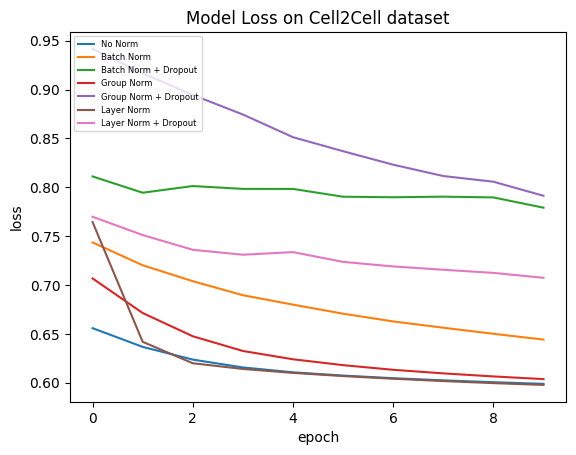

In [37]:
plt.plot(no_norm.history['loss'])
plt.plot(batch_norm.history['loss'])
plt.plot(batch_drop.history['loss'])
plt.plot(group_norm.history['loss'])
plt.plot(group_norm_drop.history['loss'])
plt.plot(layer_norm.history['loss'])
plt.plot(layer_norm_drop.history['loss'])

plt.title('Model Loss on Cell2Cell dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([
    'No Norm', 'Batch Norm', 'Batch Norm + Dropout', 'Group Norm',
    'Group Norm + Dropout', 'Layer Norm', 'Layer Norm + Dropout'
],
           prop={'size': 6}, loc = 'upper left')
plt.savefig('compare_loss_cell2cell.png')
plt.show()

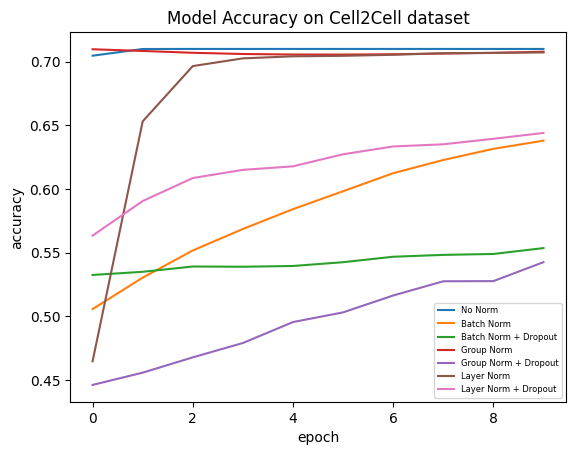

In [38]:
plt.plot(no_norm.history['accuracy'])
plt.plot(batch_norm.history['accuracy'])
plt.plot(batch_drop.history['accuracy'])
plt.plot(group_norm.history['accuracy'])
plt.plot(group_norm_drop.history['accuracy'])
plt.plot(layer_norm.history['accuracy'])
plt.plot(layer_norm_drop.history['accuracy'])

plt.title('Model Accuracy on Cell2Cell dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([
    'No Norm', 'Batch Norm', 'Batch Norm + Dropout', 'Group Norm',
    'Group Norm + Dropout', 'Layer Norm', 'Layer Norm + Dropout'
],
           prop={'size': 6})
#plt.savefig('compare_accuracy_cell2cell.png')
plt.show()

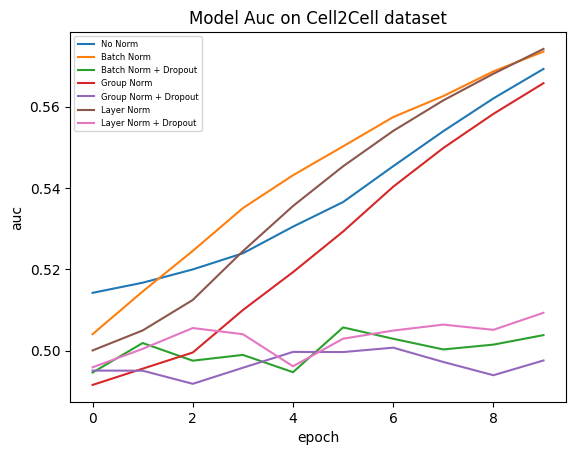

In [39]:
plt.plot(no_norm.history['auc'])
plt.plot(batch_norm.history['auc_1'])
plt.plot(batch_drop.history['auc_2'])
plt.plot(group_norm.history['auc_3'])
plt.plot(group_norm_drop.history['auc_4'])
plt.plot(layer_norm.history['auc_5'])
plt.plot(layer_norm_drop.history['auc_6'])

plt.title('Model Auc on Cell2Cell dataset')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend([
    'No Norm', 'Batch Norm', 'Batch Norm + Dropout', 'Group Norm',
    'Group Norm + Dropout', 'Layer Norm', 'Layer Norm + Dropout'
],
           prop={'size': 6})
plt.savefig('compare_auc_cell2cell.png')
plt.show()

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center")

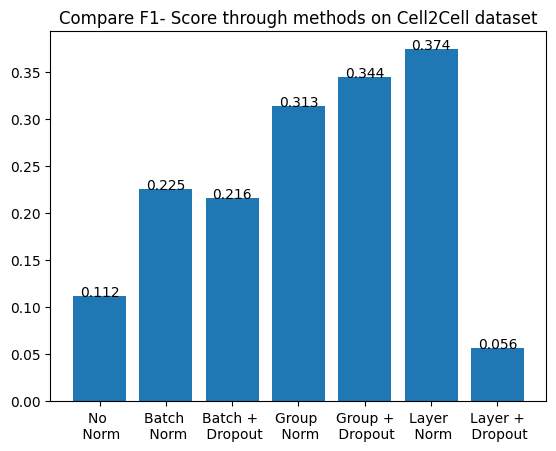

In [41]:
f_score = [0.112, 0.225, 0.216, 0.313 , 0.344,
       0.374, 0.056]
plt.bar([
    'No \n Norm', 'Batch \n Norm', 'Batch + \n Dropout', 'Group \n Norm',
    'Group +\n Dropout', 'Layer \n Norm', 'Layer +\n Dropout'
], f_score)

addlabels([
    'No \n Norm', 'Batch \n Norm', 'Batch + \n Dropout', 'Group \n Norm',
    'Group +\n Dropout', 'Layer \n Norm', 'Layer +\n Dropout'
], f_score)
plt.title("Compare F1- Score through methods on Cell2Cell dataset")
plt.savefig("f_score_cell2cell.png")
plt.show()

In [42]:
df["F1-Score"].values

array([0.        , 0.32941819, 0.22982721, 0.03318641, 0.07946705,
       0.04203425, 0.0005472 ])